In [1]:
'''
Football League Analysis:

This notebook define steps to analysis .csv files of premier league, 
championship results, etc data obtained from 'http://www.football-data.co.uk'
to answer some questions and plot nice graphs.

Copyright (C) 2017 - 2018  Osarobo Famous Okhuahesogie
E-Mail: famous.osarobo@gmail.com

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.
'''

"\nFootball League Analysis:\n\nThis notebook define steps to analysis .csv files of premier league, \nchampionship results, etc data obtained from 'http://www.football-data.co.uk'\nto answer some questions and plot nice graphs.\n\nCopyright (C) 2017 - 2018  Osarobo Famous Okhuahesogie\nE-Mail: famous.osarobo@gmail.com\n\nThis program is free software: you can redistribute it and/or modify\nit under the terms of the GNU General Public License as published by\nthe Free Software Foundation, either version 3 of the License, or\n(at your option) any later version.\n\nThis program is distributed in the hope that it will be useful,\nbut WITHOUT ANY WARRANTY; without even the implied warranty of\nMERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the\nGNU General Public License for more details.\n\nYou should have received a copy of the GNU General Public License\nalong with this program.  If not, see <http://www.gnu.org/licenses/>.\n"

In [2]:
# Required imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import time
#%pylab inline

In [3]:
def read_league_data(start_year, end_year, league=0):
    """ Reads league data files into a pandas DataFrame.
    
    Parameters
    ----------
        start_year : start year 
        end_year : end year 
        league : 0 for premiershiop, 1 for championshop, 2 for league 1,
                 3 for league 2. Default is premier league
        
    Returns
    -------
        pandas data frame
    """
    
    url_ = 'http://www.football-data.co.uk/mmz4281/'
    
    # Read first season league data
    url = url_+str(start_year)[2:]+str(start_year+1)[2:]+'/E'+str(league)+'.csv'
    raw_df = pd.read_csv(url)
    raw_df = raw_df[raw_df.columns[0:23]] # keep only the first 23 columns
    raw_df['Season'] = str(start_year)[2:]+'/'+str(start_year+1)[2:]
    raw_df.head()

    # Read other seasons
    for year in range(start_year+1, end_year):
        url = url_+str(year)[2:]+str(year+1)[2:]+'/E'+str(league)+'.csv'
        df = pd.read_csv(url)
        df = df[df.columns[0:23]] # keep only the first 23 columns
        df['Season'] = str(year)[2:]+'/'+str(year+1)[2:]
        raw_df = raw_df.append(df)
        
    return raw_df
    

In [4]:
# Loads premier league data from 2005 onwards safely. 
# Data before 2005 contains different number of columns
league_data = read_league_data(2005,2018,0)

In [5]:
league_data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000
mean,1.534928,1.136354,0.685127,0.495700,13.814349,10.847074,6.441158,4.997483,11.169708,11.692679,6.127753,4.815188,1.435284,1.799455,0.064191,0.093140
std,1.310561,1.137741,0.830642,0.714877,5.351095,4.607769,3.484010,2.921837,3.663847,3.793140,3.130240,2.740802,1.190058,1.294804,0.255184,0.301989
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,9.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,5.000000,11.000000,11.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,7.000000,14.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,7.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,33.000000,26.000000,20.000000,19.000000,7.000000,9.000000,2.000000,2.000000


In [6]:
league_data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,E0,13/08/05,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,05/06
1,E0,13/08/05,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,05/06
2,E0,13/08/05,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,05/06
3,E0,13/08/05,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,05/06
4,E0,13/08/05,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,05/06


In [7]:
league_data.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
204,E0,30/12/17,Man United,Southampton,0.0,0.0,D,0.0,0.0,D,...,3.0,12.0,13.0,10.0,7.0,2.0,4.0,0.0,0.0,17/18
205,E0,30/12/17,Newcastle,Brighton,0.0,0.0,D,0.0,0.0,D,...,3.0,11.0,10.0,3.0,6.0,2.0,2.0,0.0,0.0,17/18
206,E0,30/12/17,Watford,Swansea,1.0,2.0,A,1.0,0.0,H,...,4.0,14.0,13.0,1.0,8.0,4.0,2.0,0.0,0.0,17/18
207,E0,31/12/17,Crystal Palace,Man City,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17/18
208,E0,31/12/17,West Brom,Arsenal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17/18


In [8]:
league_data = league_data.dropna()

In [9]:
league_data.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
202,E0,30/12/17,Huddersfield,Burnley,0.0,0.0,D,0.0,0.0,D,...,4.0,14.0,14.0,5.0,4.0,2.0,1.0,0.0,0.0,17/18
203,E0,30/12/17,Liverpool,Leicester,2.0,1.0,H,0.0,1.0,A,...,1.0,7.0,3.0,7.0,1.0,3.0,2.0,0.0,0.0,17/18
204,E0,30/12/17,Man United,Southampton,0.0,0.0,D,0.0,0.0,D,...,3.0,12.0,13.0,10.0,7.0,2.0,4.0,0.0,0.0,17/18
205,E0,30/12/17,Newcastle,Brighton,0.0,0.0,D,0.0,0.0,D,...,3.0,11.0,10.0,3.0,6.0,2.0,2.0,0.0,0.0,17/18
206,E0,30/12/17,Watford,Swansea,1.0,2.0,A,1.0,0.0,H,...,4.0,14.0,13.0,1.0,8.0,4.0,2.0,0.0,0.0,17/18


In [11]:
# Lets see the column names in the data frame
league_data.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'Season'],
      dtype='object')

In [12]:
# Split date column to day, month, year columns
league_data['Day'] = league_data.Date.str.split('/').str.get(0)
league_data['Month'] = league_data.Date.str.split('/').str.get(1)
league_data['Year'] = league_data.Date.str.split('/').str.get(2)

In [13]:
# List columns again
league_data.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'Season', 'Day', 'Month', 'Year'],
      dtype='object')

In [14]:
league_data_descr = league_data.describe()
league_data_descr

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000
mean,1.534928,1.136354,0.685127,0.495700,13.814349,10.847074,6.441158,4.997483,11.169708,11.692679,6.127753,4.815188,1.435284,1.799455,0.064191,0.093140
std,1.310561,1.137741,0.830642,0.714877,5.351095,4.607769,3.484010,2.921837,3.663847,3.793140,3.130240,2.740802,1.190058,1.294804,0.255184,0.301989
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,9.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,5.000000,11.000000,11.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,7.000000,14.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,7.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,33.000000,26.000000,20.000000,19.000000,7.000000,9.000000,2.000000,2.000000


In [15]:
# Plot the description to visualise, but the count row 
# will make the plot less readable, so drop it

league_data_descr_2 = league_data_descr.drop(league_data_descr.index[0])
league_data_descr_2

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
mean,1.534928,1.136354,0.685127,0.495700,13.814349,10.847074,6.441158,4.997483,11.169708,11.692679,6.127753,4.815188,1.435284,1.799455,0.064191,0.093140
std,1.310561,1.137741,0.830642,0.714877,5.351095,4.607769,3.484010,2.921837,3.663847,3.793140,3.130240,2.740802,1.190058,1.294804,0.255184,0.301989
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,9.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,5.000000,11.000000,11.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,7.000000,14.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,7.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,33.000000,26.000000,20.000000,19.000000,7.000000,9.000000,2.000000,2.000000


In [16]:
league_data_descr_2[['FTHG','FTAG','HTHG','HTAG']].plot(kind='bar')

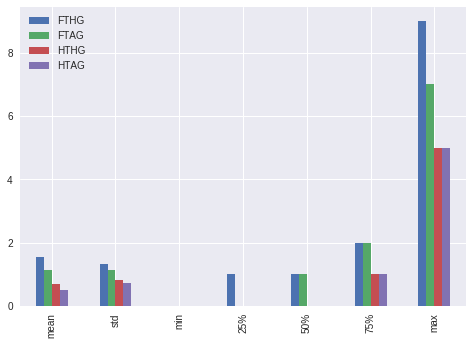

In [17]:
plt.show()

In [21]:
league_data['FTHG'].value_counts()

1.0    1512
2.0    1177
0.0    1115
3.0     595
4.0     246
5.0      74
6.0      31
7.0      11
8.0       5
9.0       1
Name: FTHG, dtype: int64

In [22]:
league_data_descr_2[['HS','AS','HST','AST','HF','AF']].plot(kind='bar')

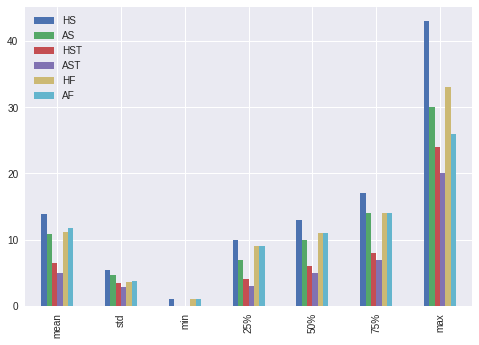

In [23]:
plt.show()

In [41]:
l_data = league_data[['FTHG','FTAG','Season','Referee']]
l_data.groupby('Season').sum().plot(kind='bar')

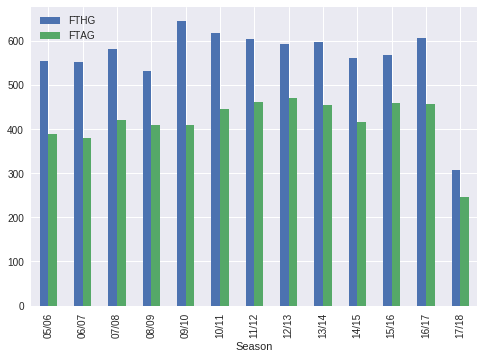

In [42]:
plt.show()

In [52]:
l_data = l_data[['Referee', 'Season']]
ll_data = l_data.groupby('Referee').count()
ll_data

,Season
Referee,
A D'Urso,1
A Marriner,266
A Taylor,181
A Wiley,145
B Knight,5
C Foy,227
C Kavanagh,8
C Pawson,100
D Gallagh,1


/opt/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


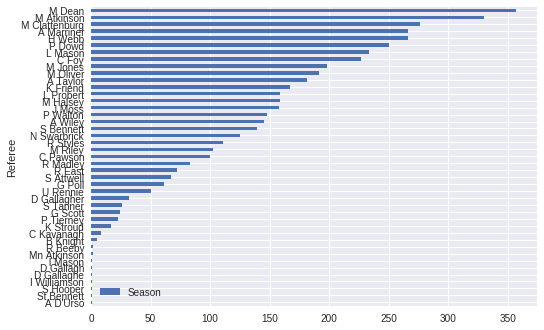

In [53]:
# For some reason, sorting by season makes the plot more readable
ll_data.sort('Season').plot(kind='barh')
plt.show()


In [55]:
# My team is chelsea. Sorry guys !!!
my_team_data = league_data[(league_data['HomeTeam'] == 'Chelsea') | (league_data['AwayTeam'] == 'Chelsea')]

In [56]:
my_team_data.sort(['Year','Month','Day'], ascending=[True,True,True])

/opt/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HC,AC,HY,AY,HR,AR,Season,Day,Month,Year
9,E0,14/08/05,Wigan,Chelsea,0.0,1.0,A,0.0,0.0,D,...,2.0,6.0,1.0,0.0,0.0,0.0,05/06,14,08,05
19,E0,21/08/05,Chelsea,Arsenal,1.0,0.0,H,0.0,0.0,D,...,3.0,7.0,2.0,3.0,0.0,0.0,05/06,21,08,05
26,E0,24/08/05,Chelsea,West Brom,4.0,0.0,H,2.0,0.0,H,...,9.0,1.0,0.0,1.0,0.0,0.0,05/06,24,08,05
30,E0,27/08/05,Tottenham,Chelsea,0.0,2.0,A,0.0,1.0,A,...,2.0,5.0,3.0,2.0,1.0,0.0,05/06,27,08,05
37,E0,10/09/05,Chelsea,Sunderland,2.0,0.0,H,0.0,0.0,D,...,4.0,2.0,1.0,0.0,0.0,0.0,05/06,10,09,05
47,E0,17/09/05,Charlton,Chelsea,0.0,2.0,A,0.0,0.0,D,...,2.0,7.0,0.0,2.0,0.0,0.0,05/06,17,09,05
58,E0,24/09/05,Chelsea,Aston Villa,2.0,1.0,H,1.0,1.0,D,...,9.0,1.0,1.0,1.0,0.0,0.0,05/06,24,09,05
73,E0,02/10/05,Liverpool,Chelsea,1.0,4.0,A,1.0,2.0,A,...,4.0,2.0,1.0,3.0,0.0,0.0,05/06,02,10,05
76,E0,15/10/05,Chelsea,Bolton,5.0,1.0,H,0.0,1.0,A,...,5.0,3.0,2.0,2.0,0.0,1.0,05/06,15,10,05
93,E0,23/10/05,Everton,Chelsea,1.0,1.0,D,1.0,0.0,H,...,3.0,11.0,2.0,2.0,0.0,0.0,05/06,23,10,05


In [59]:
my_team_data_g = my_team_data.groupby('Season').mean()

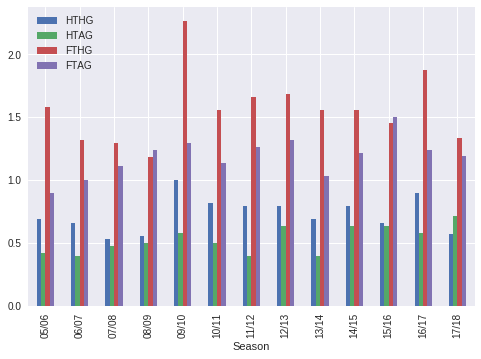

In [60]:
my_team_data_gg = my_team_data_g[['HTHG','HTAG','FTHG', 'FTAG']]
my_team_data_gg.plot(kind='bar')
plt.show()